In [1]:
import cv2
import numpy as np
from pathlib import Path
import yaml
from PIL import Image
from hfnet.datasets.aachen import Aachen
from hfnet.evaluation.localization import Localization
from hfnet.evaluation.utils.db_management import read_query_list
from hfnet.evaluation.loaders import export_loader,export_loader_db
from hfnet.settings import DATA_PATH,EXPER_PATH

from notebooks.utils import plot_matches
from notebooks.utils import plot_keypoints
import operator
from functools import reduce
from pyquaternion import Quaternion

In [2]:
# config_global = {
#     'db_name': 'globaldb_netvlad.pkl',
#     'experiment': 'netvlad/aachen',
#     'predictor': export_loader, 
#     'has_keypoints': False, 
#     'has_descriptors': False, 
#     'pca_dim': 1024,
#     'num_prior': 10,
# }
# config_local = {
#     'db_name': 'localdb_superpoint.pkl',
#     'experiment': 'superpoint/aachen',
#     'predictor': export_loader,
#     'has_keypoints': True,
#     'has_descriptors': True,
# #    'do_nms': True,
# #    'nms_thresh': 4,
#     'num_features': 2000,
#     'ratio_thresh': 0.9,
# }
config_global = {
        'db_name': 'globaldb_hfnet.pkl',
        'experiment':  'hfnet/aachen',
        'predictor_db': export_loader_db,
        'predictor': export_loader,
        'has_keypoints': False,
        'has_descriptors': False,
        'pca_dim': 1024,
        'num_prior': 10,
    }
config_local = {
        'db_name': 'localdb_hfnet.pkl',
        'experiment':  'hfnet/aachen',
        'predictor_db': export_loader_db,
        'predictor': export_loader,
        'has_keypoints': True,
        'has_descriptors': True,
        # 'do_nms': True,
        # 'nms_thresh': 4,
        'num_features': 2000,
        'ratio_thresh': 0.9,
    }
model = 'front_5to1'

In [43]:
config_pose = {
    'reproj_error': 10,
    'min_inliers': 12,
}
config = {'global': config_global, 'local': config_local, 'pose': config_pose}
loc = Localization('aachen', model, config)
queries = read_query_list(Path(loc.base_path, 'query_front_center_0711.txt'))

[09/30/2020 19:15:47 INFO] Importing COLMAP model front_5to1
/home/autolab/anaconda3/envs/cyf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/autolab/anaconda3/envs/cyf/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
[09/30/2020 19:16:10 INFO] Number of images: 36065
Number of points: 555500
Median keypoints per image: 1225.0
Ratio of matched keypoints: 0.032

[09/30/2020 19:16:10 INFO] Importing global and local databases
[09/30/2020 19:16:15 INFO] Indexing descriptors


In [44]:
eval_file = 'aachen/front_center_0711.yaml'
with open(Path(EXPER_PATH, 'eval', eval_file), 'r') as f:
    failures = yaml.load(f)['metrics']['failure']
#print(failures)
queries = [queries[f] for f in failures]  # failures
# queries = [queries[i] for i in range(len(failures))]
#print(len(queries))
# queries = [queries[i] for i in range(len(queries)) if i not in set(failures)]  # success
print(len(queries))
# print(queries[0])
# print(queries[1])

/home/autolab/anaconda3/envs/cyf/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


418


In [45]:
# np.random.RandomState(0).shuffle(queries)
query_dataset = Aachen(**{'resize_max': 960,
                          'image_names': [q.name for q in queries]})

def get_image(name):
    path = Path(DATA_PATH, query_dataset.dataset_folder,name)
    return cv2.imread(path.as_posix())[..., ::-1]
def get_image2(name):
    path = Path(DATA_PATH, query_dataset.dataset_folder,'db',name)
    return cv2.imread(path.as_posix())[..., ::-1]

QUERT IMAGE---query/1594465419.306.jpg


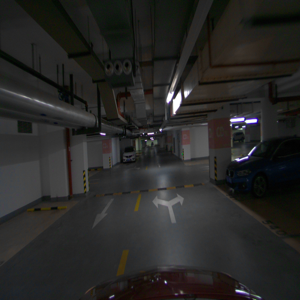

TOP K 
[670, 664, 655, 658, 661, 667, 673, 676, 712, 709]
['1596888649.050.jpg', '1596888648.217.jpg', '1596888646.967.jpg', '1596888647.384.jpg', '1596888647.800.jpg', '1596888648.633.jpg', '1596888649.466.jpg', '1596888649.882.jpg', '1596888654.970.jpg', '1596888654.552.jpg']


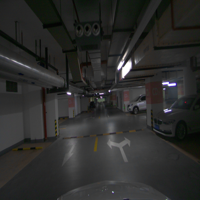

1596888649.050.jpg


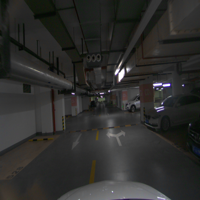

1596888648.217.jpg


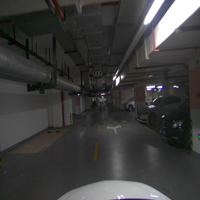

1596888646.967.jpg


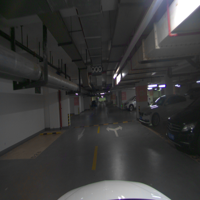

1596888647.384.jpg


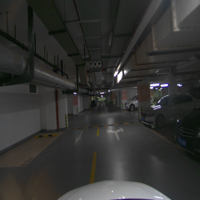

1596888647.800.jpg


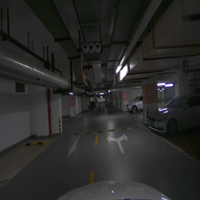

1596888648.633.jpg


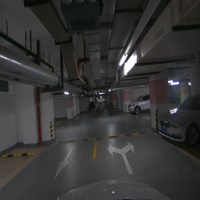

1596888649.466.jpg


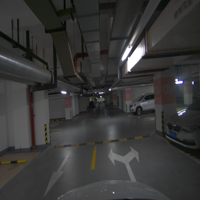

1596888649.882.jpg


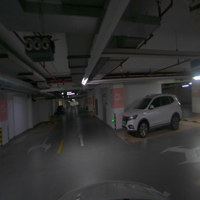

1596888654.970.jpg


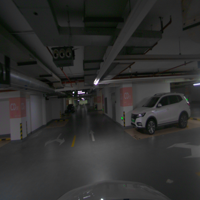

1596888654.552.jpg
FINAL_IMAGE:1596888648.633.jpg


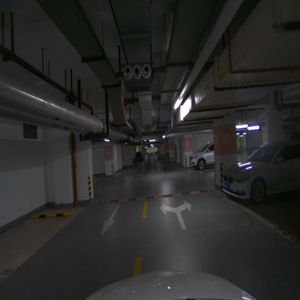

[-0.29383998289403496, -0.3071063848937654, -0.6188981419874359, 0.6605367685865907] [7.414912141740547, -3.305054519341508, -65.94360665315153]
###########################################################################################
QUERT IMAGE---query/1594465503.420.jpg


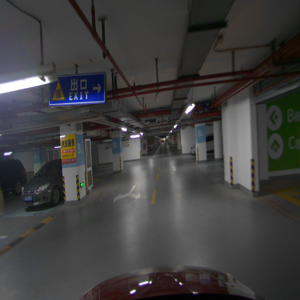

TOP K 
[14674, 32418, 14677, 32421, 14671, 12145, 12133, 14680, 28228, 14685]
['1596890625.300.jpg', '1596893106.490.jpg', '1596890625.717.jpg', '1596893106.908.jpg', '1596890624.884.jpg', '1596890272.618.jpg', '1596890270.951.jpg', '1596890626.134.jpg', '1596892519.383.jpg', '1596890626.578.jpg']


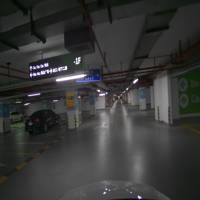

1596890625.300.jpg


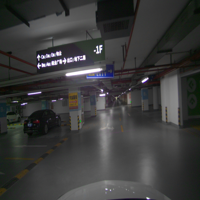

1596893106.490.jpg


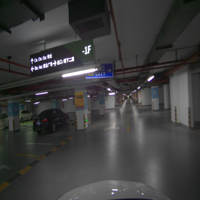

1596890625.717.jpg


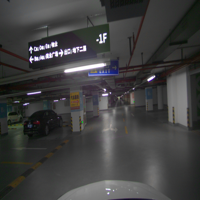

1596893106.908.jpg


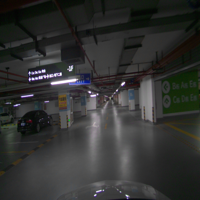

1596890624.884.jpg


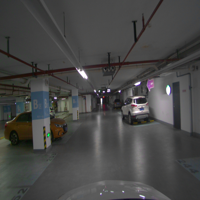

1596890272.618.jpg


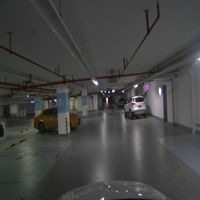

1596890270.951.jpg


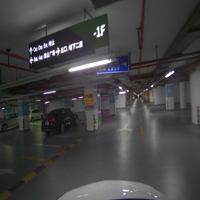

1596890626.134.jpg


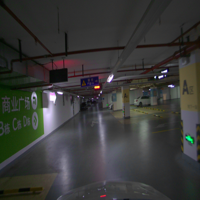

1596892519.383.jpg


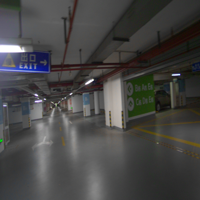

1596890626.578.jpg
FINAL_IMAGE:1596893106.490.jpg


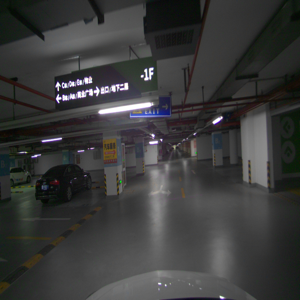

[0.6783936938871036, 0.6527930404875906, -0.253653912795178, 0.22204264209577898] [40.847419799402516, 0.6445296085816975, 150.184183943726]
###########################################################################################


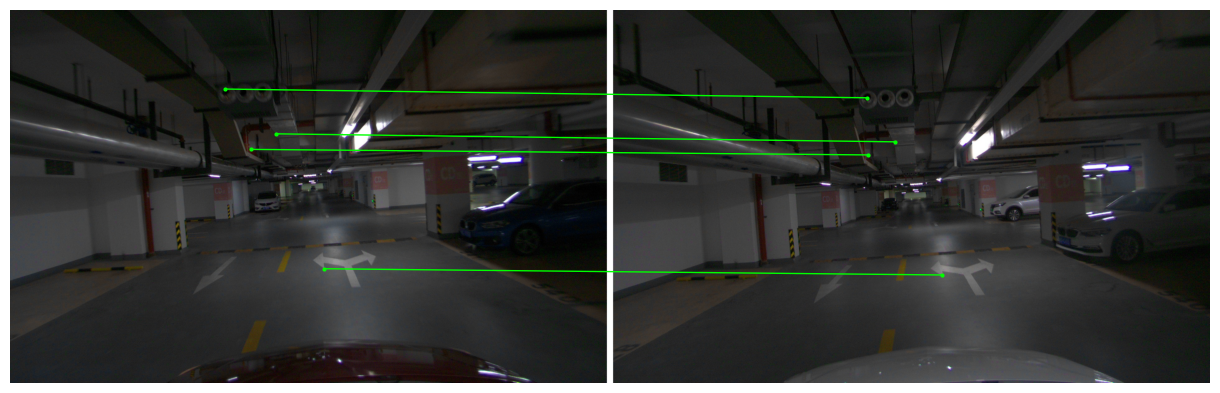

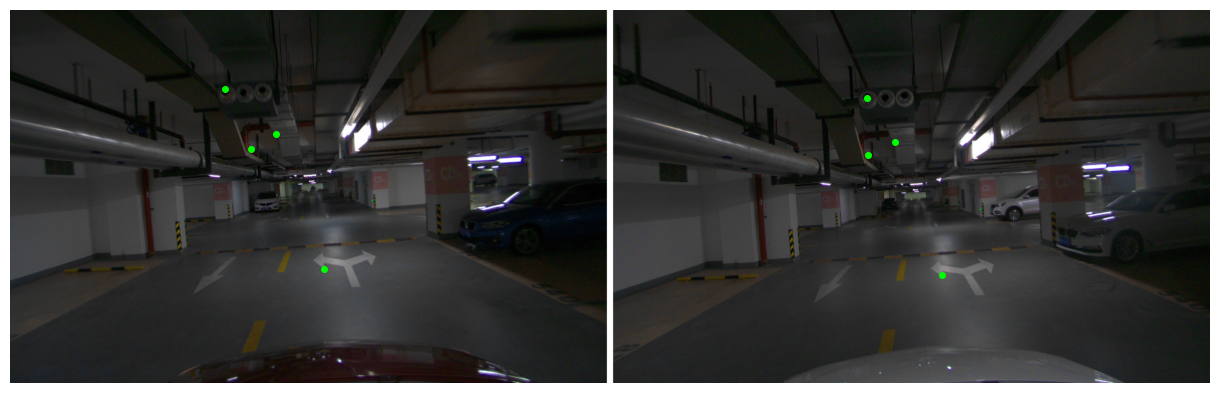

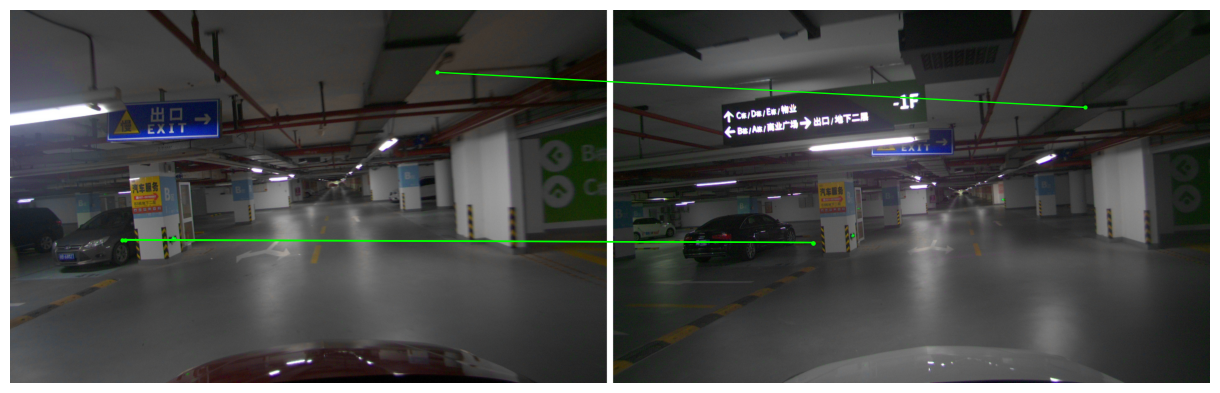

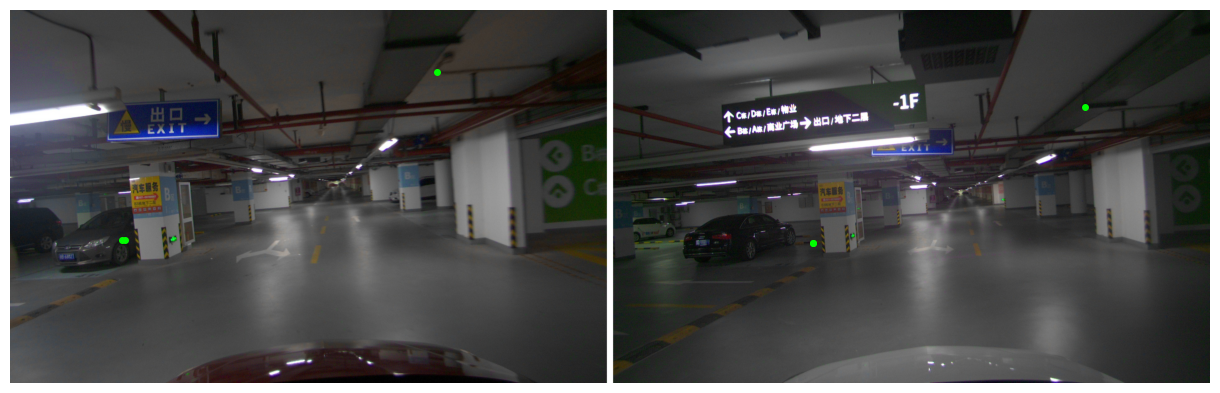

In [46]:
query_iter = query_dataset.get_test_set()
myname=['query/1594465419.306.jpg','query/1594465503.420.jpg','query/1594466227.035.jpg']
for i, query_info, query_data in zip(range(0,271), queries, query_iter):
    
    if query_info.name in myname :
        
        results, debug = loc.localize(query_info, query_data, debug=True)
    #     print("result***********************************")
    #     print(results)
        s = f'{i} {"Success" if results.success else "Failure"}, inliers {results.num_inliers:^4}, ' \
            + f'ratio {results.inlier_ratio:.3f}, landmarks {len(debug["matching"]["lm_frames"]):>4}, ' \
            + f'spl {debug["index_success"]:>2}, places {[len(p) for p in debug["places"]]:}, ' \
            + f'pos {[f"{n:.1f}" for n in results.T[:3, 3]]}'
    #     print("s********************************")
        query_T_w = np.linalg.inv(results.T)
        qvec_nvm = list(Quaternion(matrix=query_T_w))
        pos_nvm = query_T_w[:3, 3].tolist()
        #print(qvec_nvm,pos_nvm)
        #print(s)
        print("QUERT IMAGE---"+query_info.name)
        path_query=Path(DATA_PATH,'aachen/image',query_info.name)
        display(Image.open(path_query).resize((300,300)))
        #display(Image.open(path_query))
    #     print("debug_place**********************************")
   
        p=reduce(operator.add, debug["places"])
        print("TOP K ")
        print(p)
        for k in range(0,len(p)):
            p[k]=loc.images[p[k]].name
        print(p)
   

        for pname in p:
            path_topk=Path(DATA_PATH, 'aachen/image/db',pname)
            display(Image.open(path_topk).resize((200,200)))
            print(pname)
    #         display(Image.open(path_topk))
    
    
    
    #     print("place:",debug["places"])

        sorted_frames, counts = np.unique(
            [debug['matching']['lm_frames'][m2] for m1, m2 in debug['matches'][debug['inliers']]],
            return_counts=True)
    #     print("debug['matching']['lm_frames']*****************************")
    #     print(debug['matching']['lm_frames'])
    #     print("debug['matches'][debug['inliers']]************************")
    #     print(debug['matches'][debug['inliers']])
    #     print("sorted_frames********************************")
    #     print("first succesed place:",sorted_frames)
    #     print("counts********************************")
    #     print("number of inliers:",counts)
        best_id = sorted_frames[np.argmax(counts)]
    #     print("best_id********************************")
    #     print("best image:",best_id)

        query_image = get_image(query_info.name)
    #     print("query_info.name********************************")
    #     print(query_info.name)
    #     print(len(loc.images))
    #     print(loc.images[2010].name)
    #     b=get_image2('6603.jpg')
        best_image = get_image2(loc.images[best_id].name)
    #     print("loc.image[best_id].name********************************")
    #     print("best_iamge_name",loc.images[best_id].name)
    
        print("FINAL_IMAGE:"+loc.images[best_id].name)
        path_final=Path(DATA_PATH,'aachen/image/db',loc.images[best_id].name)
        display(Image.open(path_final).resize((300,300)))
        #display(Image.open(path_final))
        best_matches_inliers = [(m1, debug['matching']['lm_indices'][m2]) 
                                for m1, m2 in debug['matches'][debug['inliers']] 
                                if debug['matching']['lm_frames'][m2] == best_id]
    #     print("best_matchees_inliners*******************************")
    #     print(best_matches_inliers)
        best_matches_outliers = [(m1, debug['matching']['lm_indices'][m2])
                                for i, (m1, m2) in enumerate(debug['matches']) 
                                if debug['matching']['lm_frames'][m2] == best_id
                                and i not in debug['inliers']]
        #print("best_matchees_outliners*******************************")
        #print(best_matches_outliers )
        plot_matches(
            query_image, debug['query_item'].keypoints,
            best_image, loc.local_db[best_id].keypoints,
            np.array(best_matches_inliers), color=(0, 1., 0),
            dpi=100, ylabel=str(i), thickness=1.)
    #     plot_matches(
    #         query_image, debug['query_item'].keypoints,
    #         best_image, loc.local_db[best_id].keypoints,
    #         #np.array(best_matches_inliers), color=(0, 1., 0),
    #         np.array(best_matches_outliers), color=(1., 0, 0),       
    #         dpi=100, ylabel=str(i), thickness=1.)
        plot_keypoints(
            query_image, debug['query_item'].keypoints,
            best_image, loc.local_db[best_id].keypoints,
            np.array(best_matches_inliers), color=(0, 1., 0),
            dpi=100, ylabel=str(i), thickness=1.)
    #     plot_keypoints(
    #         query_image, debug['query_item'].keypoints,
    #         best_image, loc.local_db[best_id].keypoints,
    #         #np.array(best_matches_inliers), color=(0, 1., 0),
    #         np.array(best_matches_outliers), color=(1., 0, 0),       
    #         dpi=100, ylabel=str(i), thickness=1.)
        print(qvec_nvm,pos_nvm)

        print("###########################################################################################")

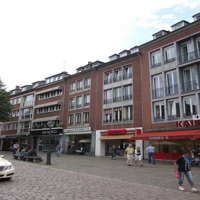

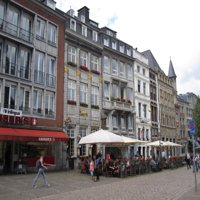

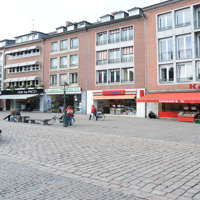

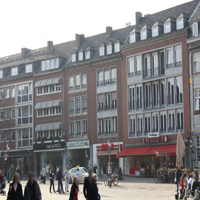

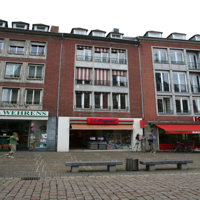

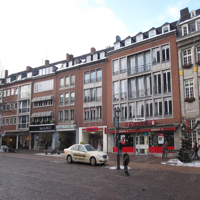

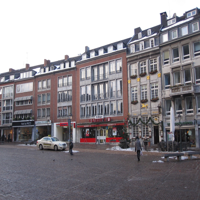

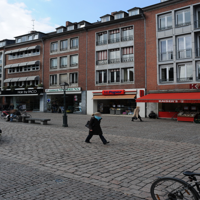

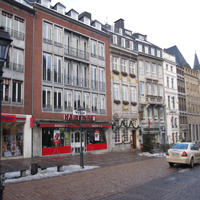

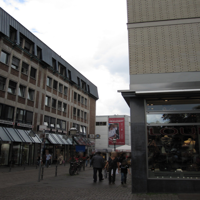

In [28]:
from PIL import Image

p=['db/1286.jpg', 'db/1344.jpg', 'db/2643.jpg', 'db/302.jpg', 'db/2341.jpg', 'db/1853.jpg', 'db/1883.jpg', 'db/2608.jpg', 'db/1860.jpg', 'db/1552.jpg']
for pname in p:
    path=Path(DATA_PATH, 'aachen/images_upright',pname)
    display(Image.open(path).resize((200,200)))


